In [1]:
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('../dataset/dataset.csv')

In [2]:
data.head()

,screen_name,retweet_count,plain_text_len,question_marks,esclamation_marks,emojis,hashtags,tags,urls,verbs,nouns,adjs,advs
0,CookGlobal,6,135,0,1,0,1,2,2,4,8,6,0
1,CookGlobal,8,146,0,2,0,3,0,2,3,13,3,1
2,CookGlobal,0,189,0,2,2,1,0,2,5,12,6,2
3,CookGlobal,16,165,0,2,2,3,0,2,5,9,5,5
4,CookGlobal,7,121,0,0,0,0,2,2,2,11,4,0


In [58]:
freq = data['retweet_count'].value_counts()

x = freq.values.tolist()
y = freq.index.tolist()

<BarContainer object of 57 artists>

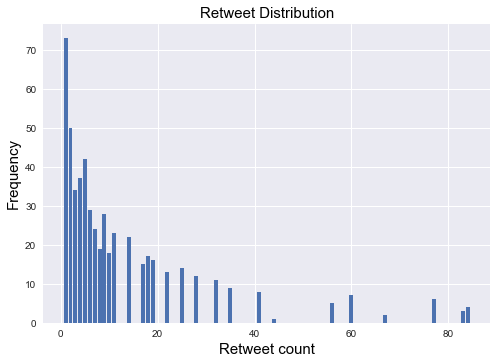

In [90]:
plt.style.use("seaborn")
plt.title('Retweet Distribution', color='black', size=15)
plt.xlabel('Retweet count', color='black', size=15)
plt.ylabel('Frequency', color='black', size=15)
plt.bar(x,y)

In [181]:
mean = data[['screen_name', 'retweet_count']].groupby(['screen_name']).mean().round(0).sort_values('retweet_count')
x = []
for element in mean.values:
    x.append(int(element))


<BarContainer object of 11 artists>

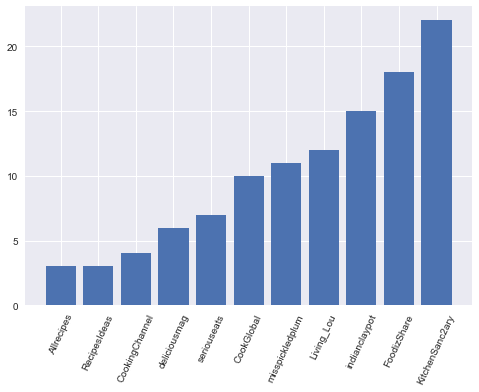

In [182]:
plt.xticks(rotation=65)
plt.bar(mean.index, height=x)

In [215]:
ordered_names = mean.index.tolist()
print(ordered_names)
ordered_values = []

count = data['screen_name'].value_counts()
print(count)

for index in range(0, len(ordered_names)):
    for i, element in enumerate(count.index.tolist()):
        if ordered_names[index] == element:
            ordered_values.append(count.values[i])
    
ordered_values

['Allrecipes', 'RecipesIdeas', 'CookingChannel', 'deliciousmag', 'seriouseats', 'CookGlobal', 'misspickledplum', 'Living_Lou', 'indianclaypot', 'FoodizShare', 'KitchenSanc2ary']
Living_Lou         220
CookGlobal         158
KitchenSanc2ary    148
Allrecipes         115
deliciousmag       109
RecipesIdeas        61
seriouseats         58
misspickledplum     26
CookingChannel      20
indianclaypot        7
FoodizShare          6
Name: screen_name, dtype: int64


[115, 61, 20, 109, 58, 158, 26, 220, 7, 6, 148]

<BarContainer object of 11 artists>

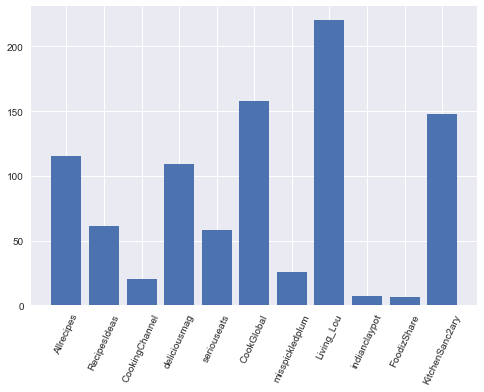

In [216]:
plt.xticks(rotation=65)
plt.bar(ordered_names, ordered_values)

<ipython-input-225-f05cede503d5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(ordered_names, rotation=65)
<ipython-input-225-f05cede503d5>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(mean.index, rotation=65)


<BarContainer object of 11 artists>

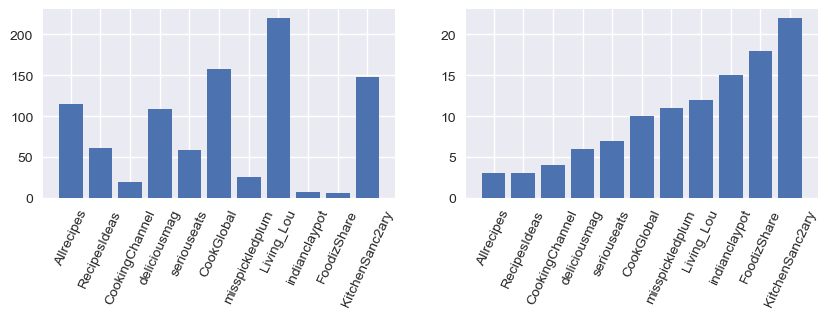

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(10,2.5), dpi=100)
axes[0].set_xticklabels(ordered_names, rotation=65)
axes[0].bar(ordered_names, ordered_values)
axes[1].set_xticklabels(mean.index, rotation=65)
axes[1].bar(mean.index, height=x)